
#   Restaurant Revenue Prediction
https://www.kaggle.com/c/restaurant-revenue-prediction#description
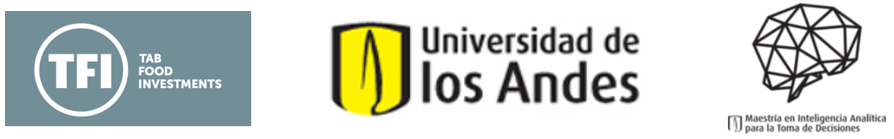

###### Jessica Barón Martínez Código: 200924758, Nelson Andrés Rozo Cruz Código: 201728031
###### Wilfredo David Vega Buelvas, código 201727430, Camilo Torres Ovalle, código 201747423
___________________________________________________________________________________________________________________________

### Descripción.

With over 1,200 quick service restaurants across the globe, TFI is the company behind some of the world's most well-known brands: Burger King, Sbarro, Popeyes, Usta Donerci, and Arby’s. They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites.

Right now, deciding when and where to open new restaurants is largely a subjective process based on the personal judgement and experience of development teams. This subjective data is difficult to accurately extrapolate across geographies and cultures. 
New restaurant sites take large investments of time and capital to get up and running. When the wrong location for a restaurant brand is chosen, the site closes within 18 months and operating losses are incurred.

Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow TFI to invest more in other important business areas, like sustainability, innovation, and training for new employees. Using demographic, real estate, and commercial data, this competition challenges you to predict the annual restaurant sales of 100,000 regional locations.


___________________________________________________________________________________________________________________________
### Importación de los datos

In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/Nrozo/Documents/Analytics/Deep Learning y redes neuronales/proyecto3/train.csv")
test = pd.read_csv("C:/Users/Nrozo/Documents/Analytics/Deep Learning y redes neuronales/proyecto3/test.csv")

___________________________________________________________________________________________________________________________
### Descripción de la base de datos

In [2]:
# Tamaño de bases de datos
print("Dimension Train:",train.shape)
print("Dimension Test:",test.shape)

Dimension Train: (137, 43)
Dimension Test: (100000, 42)


In [3]:
# Muestra de la base de datos
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
# Nombre de las variables
train.columns.values

array(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22',
       'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'], dtype=object)

In [5]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [6]:
# Conteo de los NA e identificación de las variables que con mayor número de NA´s
# Test
a_train = pd.DataFrame(train.isnull().sum())
a_train.columns = ['# clientes']
a_train.sort_values(by=['# clientes'],ascending=False)

,# clientes
Id,0
P28,0
P20,0
P21,0
P22,0
P23,0
P24,0
P25,0
P26,0
P27,0


In [7]:
# Test
a_test = pd.DataFrame(test.isnull().sum())
a_test.columns = ['# clientes']
a_test.sort_values(by=['# clientes'],ascending=False)

,# clientes
Id,0
P27,0
P19,0
P20,0
P21,0
P22,0
P23,0
P24,0
P25,0
P26,0


___________________________________________________________________________________________________________________________
### Creación de variables dummies y calculadas

In [8]:
# Años de apertura del restaurante
import time
from datetime import datetime as dt
# train
all_diff = []
for date in train["Open Date"]:
    diff = dt.now() - dt.strptime(date, "%m/%d/%Y")
    all_diff.append(int(diff.days/365.25))

train['Years_opening'] = pd.Series(all_diff)
print(train.head())

   Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   

       ...        P30  P31  P32  P33  P34  P35  P36  P37    revenue  \
0      ...          5    3    4    5    5    4    3    4  5653753.0   
1      ...          0    0    0    0    0    0    0    0  6923131.0   
2      ...          0    0    0    0    0    0    0    0  2055379.0   
3      ...         25   12   10    6   18   12   12    6  2675511.0   
4      ...          5    1    3    2    3    4    3    3  4316715.0   

   Years_opening  
0             18  
1             10  
2              5  
3              6  
4              9  

[5 rows x 44 column

In [9]:
# test
all_diff = []
for date in test["Open Date"]:
    diff = dt.now() - dt.strptime(date, "%m/%d/%Y")
    all_diff.append(int(diff.days/365.25))

test['Years_opening'] = pd.Series(all_diff)
print(test.head())

   Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   

       ...        P29  P30  P31  P32  P33  P34  P35  P36  P37  Years_opening  
0      ...        3.0    0    0    0    0    0    0    0    0              7  
1      ...        3.0    0    0    0    0    0    0    0    0              7  
2      ...        3.0    0    0    0    0    0    0    0    0              4  
3      ...        3.0    0    4    0    0    0    0    0    0              5  
4      ...        3.0    0    0    0    0    0    0    0    0              4  

[5 rows x 43 columns]


In [10]:
# Se elimina la columna Open Date para train y test
train=train.drop("Open Date",1)
test=test.drop("Open Date",1)

In [11]:
# Creación de variables dummies

# Se eliminan las columnas City y Type quedándon solo City Group para la generación de dummies

train=train.drop("City",1)
train=train.drop("Type",1)

test=test.drop("City",1)
test=test.drop("Type",1)

train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [12]:
# Se eliminan las variable dummy City Group_Other
train=train.drop("City Group_Other",1)
test=test.drop("City Group_Other",1)

In [13]:
train.columns.values

array(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
       'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Years_opening', 'City Group_Big Cities'], dtype=object)

In [14]:
test.columns.values

array(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
       'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'Years_opening', 'City Group_Big Cities'], dtype=object)

In [15]:
train2=train.drop("revenue",1)
train2=train2.drop("Id",1)

train2.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,Years_opening,City Group_Big Cities
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,3,4,5,5,4,3,4,18,1
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,0,10,1
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,5,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,25,12,10,6,18,12,12,6,6,0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,5,1,3,2,3,4,3,3,9,0


In [16]:
import numpy as np

np.corrcoef(train2)
tr2_cor=train2.corr( method = 'pearson' , min_periods = 1 )
tr2_cor

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,Years_opening,City Group_Big Cities
P1,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,0.795885,...,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.086065,0.258556
P2,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,0.498135,...,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.183479,0.421095
P3,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,0.764191,...,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,0.017197,0.082172
P4,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,0.685416,...,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,-0.027280,0.174134
P5,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,0.462299,...,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.124555,-0.019195
P6,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,0.654594,...,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.195606,0.416644
P7,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,0.775642,...,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,-0.002645,0.193106
P8,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,0.881650,...,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.043436,0.071993
P9,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,0.961266,...,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.074964,0.018305
P10,0.795885,0.498135,0.764191,0.685416,0.462299,0.654594,0.775642,0.881650,0.961266,1.000000,...,0.514738,0.462235,0.549238,0.320317,0.601956,0.483010,0.565068,0.313748,-0.081720,-0.001169


In [17]:
# Se evaluan las variables al quitar las que tienen una mayor correlación

train2=train2.drop("P36",1).drop("P12",1).drop("P13",1).drop("P26",1).drop("P9",1).drop("P18",1).drop("P34",1).drop("P25",1)
train2=train2.drop("P32",1).drop("P15",1).drop("P31",1).drop("P35",1).drop("P14",1).drop("P8",1).drop("P37",1).drop("P30",1)
train2=train2.drop("P24",1).drop("P1",1).drop("P23",1).drop("P16",1).drop("P20",1).drop("P29",1).drop("P7",1).drop("P2",1)
train2=train2.drop("P28",1).drop("P10",1).drop("P21",1).drop("P33",1).drop("P19",1).drop("P5",1)

train2.head()

,P3,P4,P6,P11,P17,P22,P27,Years_opening,City Group_Big Cities
0,4.0,4.0,2,3,2,3,4.0,18,1
1,4.0,4.0,2,1,0,3,0.0,10,1
2,2.0,5.0,3,2,0,1,0.0,5,0
3,6.0,6.0,4,8,3,1,2.5,6,0
4,3.0,4.0,2,2,1,2,5.0,9,0


In [18]:
np.corrcoef(train2)
tr2_cor=train2.corr( method = 'pearson' , min_periods = 1 )
print(tr2_cor)

                             P3        P4        P6       P11       P17  \
P3                     1.000000  0.443606  0.570486  0.417752  0.327644   
P4                     0.443606  1.000000  0.595724  0.585285  0.235605   
P6                     0.570486  0.595724  1.000000  0.432959  0.380396   
P11                    0.417752  0.585285  0.432959  1.000000  0.274182   
P17                    0.327644  0.235605  0.380396  0.274182  1.000000   
P22                    0.243983  0.076177  0.206913  0.202788  0.226162   
P27                    0.257228  0.109555  0.334761  0.053513  0.600446   
Years_opening          0.017197 -0.027280  0.195606  0.112202  0.213758   
City Group_Big Cities  0.082172  0.174134  0.416644  0.120045  0.183261   

                            P22       P27  Years_opening  \
P3                     0.243983  0.257228       0.017197   
P4                     0.076177  0.109555      -0.027280   
P6                     0.206913  0.334761       0.195606   
P11      

In [19]:
#Listar las máxima correlación de una variable
ltr2_cor=abs(tr2_cor.replace(1,0)).max()
ltr2_cor.sort_values()

Years_opening            0.213758
P22                      0.256669
City Group_Big Cities    0.416644
P3                       0.570486
P11                      0.585285
P4                       0.595724
P6                       0.595724
P17                      0.600446
P27                      0.600446
dtype: float64

Se reduce la base dejando solo las columnas definidas en el paso anterior

In [20]:
train=train[["Id","P3","P4","P6","P11","P17","P22","P27","Years_opening","City Group_Big Cities","revenue"]]
train.head()

,Id,P3,P4,P6,P11,P17,P22,P27,Years_opening,City Group_Big Cities,revenue
0,0,4.0,4.0,2,3,2,3,4.0,18,1,5653753.0
1,1,4.0,4.0,2,1,0,3,0.0,10,1,6923131.0
2,2,2.0,5.0,3,2,0,1,0.0,5,0,2055379.0
3,3,6.0,6.0,4,8,3,1,2.5,6,0,2675511.0
4,4,3.0,4.0,2,2,1,2,5.0,9,0,4316715.0


In [21]:
test=test[["Id","P3","P4","P6","P11","P17","P22","P27","Years_opening","City Group_Big Cities"]]
test.head()

,Id,P3,P4,P6,P11,P17,P22,P27,Years_opening,City Group_Big Cities
0,0,4.0,4.0,2,5,2,1,0.0,7,0
1,1,4.0,4.0,2,2,0,2,0.0,7,0
2,2,4.0,4.0,2,4,0,5,0.0,4,1
3,3,4.0,4.0,3,3,0,2,0.0,5,0
4,4,4.0,4.0,2,3,0,1,0.0,4,0


___________________________________________________________________________________________________________________________
### Selección del mejor modelo

In [22]:
#cargamos las siguientes algoritmos

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso


models = {'SVR': SVR(),
          'LR': LinearRegression(),
          'LS': Lasso(),
          'RD': Ridge(),
          'RF': RandomForestRegressor()}

#realizamos la partición
x_train, x_test, y_train, y_test =train_test_split(train.drop("revenue",1).drop("Id",1),train[["revenue"]],random_state=2)

for model in models.keys():
    models[model].fit(x_train, y_train)

C:\Users\Nrozo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nrozo\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [23]:
# Realizamos la predicción para cada modelo

y_pred5 = pd.DataFrame(index=x_test.index, columns=models.keys())
for model in models.keys():
    y_pred5[model] = models[model].predict(x_test)

In [24]:
print(train.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(137, 11)
(102, 9)
(102, 1)
(35, 9)
(35, 1)


In [25]:
y_pred5

,SVR,LR,LS,RD,RF
105,3.969425e+06,4.331409e+06,4.331412e+06,4.341928e+06,4.651418e+06
108,3.969421e+06,3.264246e+06,3.264250e+06,3.277526e+06,2.203050e+06
59,3.969427e+06,5.350672e+06,5.350669e+06,5.333140e+06,6.697330e+06
5,3.969426e+06,5.631471e+06,5.631466e+06,5.644458e+06,6.124140e+06
45,3.969426e+06,4.070847e+06,4.070846e+06,4.110747e+06,5.040345e+06
3,3.969426e+06,2.973948e+06,2.973954e+06,2.995481e+06,5.030955e+06
28,3.969426e+06,6.814976e+06,6.814975e+06,6.797568e+06,5.864460e+06
111,3.969421e+06,3.164593e+06,3.164598e+06,3.177241e+06,2.050320e+06
12,3.969422e+06,4.191441e+06,4.191440e+06,4.163800e+06,2.440823e+06
41,3.969426e+06,4.872303e+06,4.872298e+06,4.864268e+06,6.910773e+06


In [26]:
from sklearn import metrics
#from sklearn.metrics import mean_squared_error
#import numpy as np
#from math import sqrt

print("Support Vector Machine:",np.sqrt(metrics.mean_squared_error(y_pred5["SVR"],y_test)))
print("Linear Regression:     ",np.sqrt(metrics.mean_squared_error(y_pred5["LR"],y_test)))
print("Lasso:                 ",np.sqrt(metrics.mean_squared_error(y_pred5["LS"],y_test)))
print("Ridge:                 ",np.sqrt(metrics.mean_squared_error(y_pred5["RD"],y_test)))
print("Random Forest:         ",np.sqrt(metrics.mean_squared_error(y_pred5["RF"],y_test)))

Support Vector Machine: 2247702.6784880045
Linear Regression:      2147914.733120817
Lasso:                  2147914.0609999173
Ridge:                  2147903.207954942
Random Forest:          2319122.3949795044


___________________________________________________________________________________________________________________________
### Generar predicciones con los modelos

In [27]:
#realizamos la partición

X_TRAIN=train.drop("revenue",1).drop("Id",1)
X_TEST=test.drop("Id",1)
Y_TRAIN=train[["revenue"]]

for model in models.keys():
    models[model].fit(X_TRAIN, Y_TRAIN)
    
# Realizamos la predicción para cada modelo

Y_PRED = pd.DataFrame(index=X_TEST.index, columns=models.keys())
for model in models.keys():
    Y_PRED[model] = models[model].predict(X_TEST)

C:\Users\Nrozo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nrozo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [28]:
Y_PRED

,SVR,LR,LS,RD,RF
0,3.939802e+06,3.880344e+06,3.880341e+06,3.889460e+06,3636522.90
1,3.939799e+06,3.627249e+06,3.627252e+06,3.641941e+06,3927366.80
2,3.939800e+06,4.062383e+06,4.062382e+06,4.049427e+06,2628056.00
3,3.939797e+06,3.409506e+06,3.409507e+06,3.426316e+06,2849632.20
4,3.939795e+06,3.162985e+06,3.162985e+06,3.173490e+06,2415381.10
5,3.939805e+06,4.312619e+06,4.312621e+06,4.339335e+06,5043298.00
6,3.939802e+06,4.075191e+06,4.075192e+06,4.089301e+06,4639906.10
7,3.939799e+06,4.013701e+06,4.013699e+06,3.994780e+06,2932272.90
8,3.939804e+06,5.447401e+06,5.447401e+06,5.440730e+06,7746385.80
9,3.939803e+06,4.206367e+06,4.206361e+06,4.201977e+06,3649687.10


In [29]:
Y_PRED.to_csv("Y_PRED", sep='\t')